In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pickle
import cv2
from scipy import misc

In [37]:
# Display function for CIFAR-10
def display(image):
    plt.imshow(misc.toimage(sample_img.transpose(1,2,0)), interpolation = 'nearest')

In [38]:
data_directory_path = './Datasets/cifar-10-batches-py'

In [39]:
def unpickle(file):
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

In [40]:
def loadBatch(filepath):
    dataset = unpickle(filepath)
    dataSamples = dataset[b'data']
    labels = dataset[b'labels']
    label_count = np.max(labels)
    hotKeyEncodings = np.array([[0 if labels[i] != j else 1 for j in range(label_count + 1)] for i in range(len(labels))])
    return dataSamples, hotKeyEncodings, labels

In [41]:
# Load training data (X is the input data, Y the hotkey encodings and y the label code numbers)
X_tr, Y_tr, y_tr = loadBatch(data_directory_path + '/data_batch_' + str(1))
for i in range(2,6):
    Xnew, Ynew, ynew = loadBatch(data_directory_path + '/data_batch_' + str(i))
    X_tr = np.vstack((X_tr, Xnew))
    Y_tr = np.vstack((Y_tr, Ynew))
    y_tr = np.hstack((y_tr, ynew))

In [42]:
# Load test data
X_tst, Y_tst, y_tst = loadBatch(data_directory_path + '/test_batch')

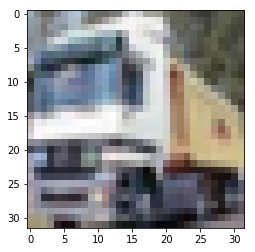

In [45]:
image = X_tr[1]
sample_img = image.reshape((3, 32, 32))
sample_img = sample_img
display(sample_img)